### COVID-19 
### UPDATE by DAY in the countries: 
#### CHINA, GERMANY, ITALY, KOREA, JAPAN, USA, AUSTRALIA, LUXEMBOURG, UK, CANADA, VIETNAM
#### (Start recorded day: 22.01.2020)

In [1]:
from covid import *
%matplotlib inline

Start importing World-data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/
Start importing USA-data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports_us/
Start importing single data  ./data/COVID-19/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv
Start importing single data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Start importing single data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
Start importing single data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv


In [2]:
len(countries_no_infopopulation)

35

In [3]:
countries_no_infopopulation

['Jersey',
 'The Gambia',
 'Curacao',
 'Cape Verde',
 'Mayotte',
 'East Timor',
 'Guadeloupe',
 'Macau',
 'Guam',
 'Cayman Islands',
 'Hong Kong',
 'Palestine',
 ' Azerbaijan',
 'Gibraltar',
 'North Ireland',
 'French Guiana',
 'Channel Islands',
 'Ivory Coast',
 'Republic of Moldova',
 'Reunion',
 'St. Martin',
 'Vatican City',
 'The Bahamas',
 'Faroe Islands',
 'Saint Barthelemy',
 'Greenland',
 'Republic of the Congo',
 'Puerto Rico',
 'occupied Palestinian territory',
 'Saint Martin',
 'Taipei and environs',
 'Martinique',
 'Aruba',
 'Guernsey',
 'Others_and_ships']

### Number of covid-19 outbreak days 

In [4]:
rcParams['figure.figsize'] = 20, 10
len(data)

487

In [5]:
updated_date=files[-1].split('.')[0]
updated_date

'05-22-2021'

### COVID situation in the World is being changed by day
### ARE WE BEATING COVID-19?

The World still has 60134757.0 active cases

In last 7 days:  [60626014. 60410606. 60275428. 60235149. 60214345. 60199176. 60134757.]


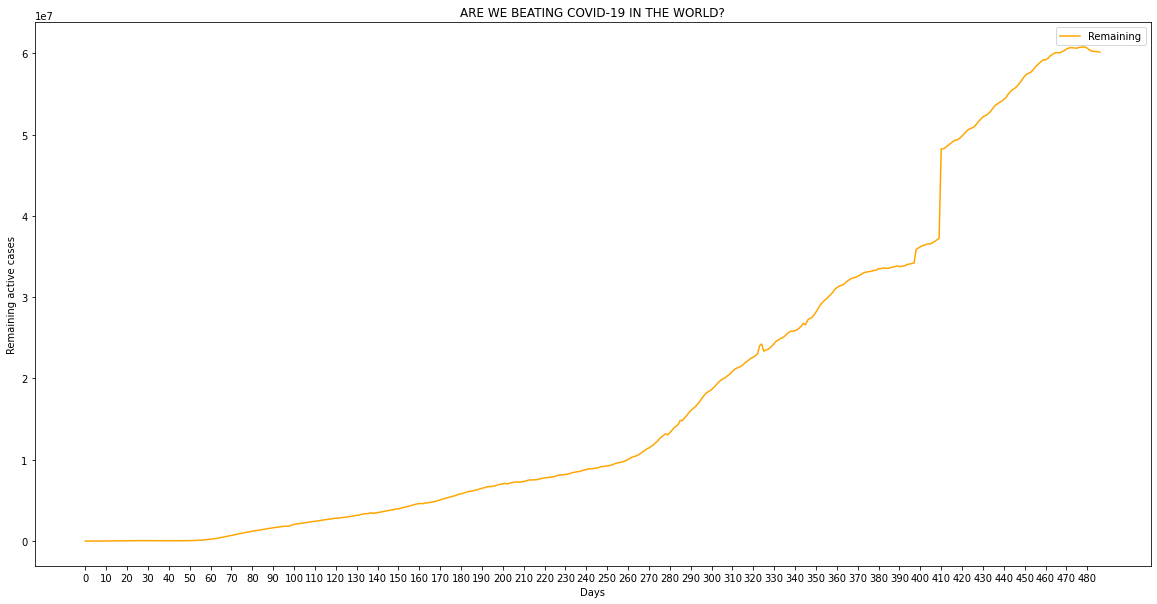

In [6]:
remaining_by_day = np.array(totalconfirmed_by_day) - np.array(totalrecovered_by_day) - np.array(totalfatalities_by_day)

plt.xticks(np.arange(0, max(x_dat)+1, 10))
plt.plot(x_dat, remaining_by_day, color='orange', label='Remaining')
plt.xlabel('Days')
plt.ylabel('Remaining active cases')
plt.title("ARE WE BEATING COVID-19 IN THE WORLD?")
plt.legend()
plt.savefig('output/AreWeBeatingCovid.jpg')
print("The World still has %0.1f active cases\n"% remaining_by_day[-1])
print("In last 7 days: ", remaining_by_day[-7:])

In [32]:
countries_remaining = countries_confirmed-countries_fatalities-countries_recovered
# Mitigate the negative values by converting all negative values to 0
countries_remaining.mask(countries_remaining<0, 0, inplace=True)

countries_remaining.tail(1).sort_values(by=486, axis=1, ascending=False).transpose().head(30)

,486
US,32515181.0
France,5488735.0
United Kingdom,4332892.0
Spain,3406457.0
India,2805399.0
Netherlands,1605505.0
Brazil,1466788.0
Sweden,1043975.0
Belgium,1022305.0
Serbia,702907.0


#### Notes: remaining number in US does not include the recovered data

In [8]:
daily_confirmed_sum = np.array([sum(countries_confirmed.iloc[i]) for i in range(len(countries_confirmed))])
daily_fatal_sum = np.array([sum(countries_fatalities.iloc[i]) for i in range(len(countries_fatalities))])
daily_recovered_sum = np.array([sum(countries_recovered.iloc[i]) for i in range(len(countries_recovered))])

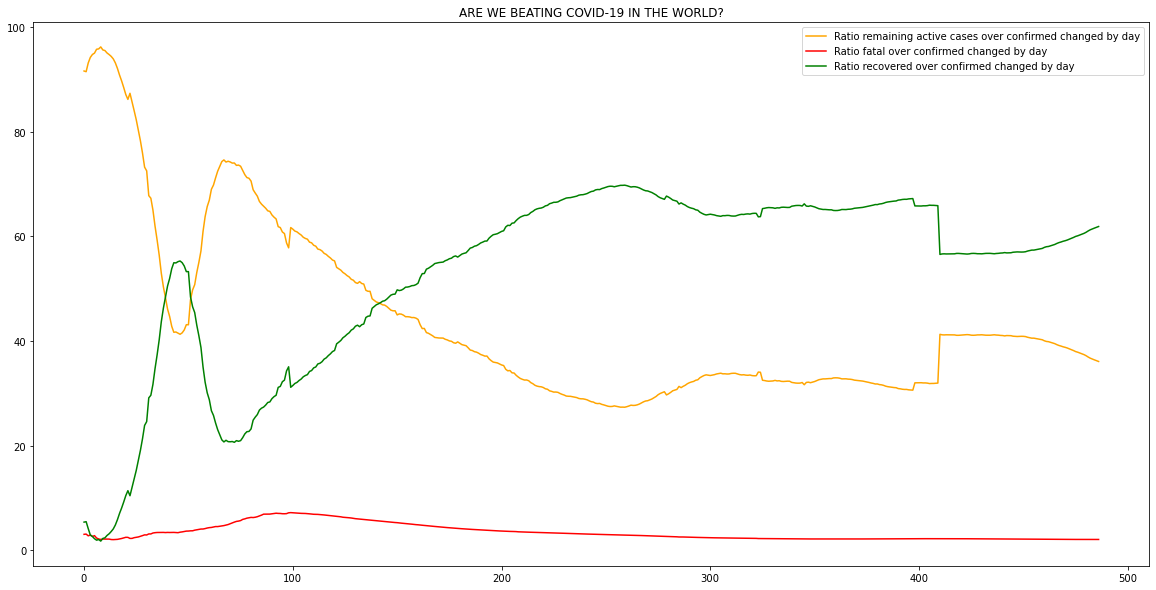

In [9]:
plt.plot(x_dat, ((daily_confirmed_sum-daily_recovered_sum-daily_fatal_sum)/daily_confirmed_sum)*100, color='orange', label='Ratio remaining active cases over confirmed changed by day')
plt.plot(x_dat, (daily_fatal_sum/daily_confirmed_sum)*100, color='red', label='Ratio fatal over confirmed changed by day')
plt.plot(x_dat, (daily_recovered_sum/daily_confirmed_sum)*100, color='green', label='Ratio recovered over confirmed changed by day')
plt.title("ARE WE BEATING COVID-19 IN THE WORLD?")
plt.legend()
plt.savefig('output/AreWeBeatingCovid_ratio.jpg')

### Countries are beating COVID most

,486
Others_and_ships,0.0
Marshall Islands,0.0
Vanuatu,0.0
Palestine,0.0
Cape Verde,0.0
The Bahamas,0.0
Taipei and environs,0.0
Mayotte,0.0
Grenada,0.0
Faroe Islands,0.0


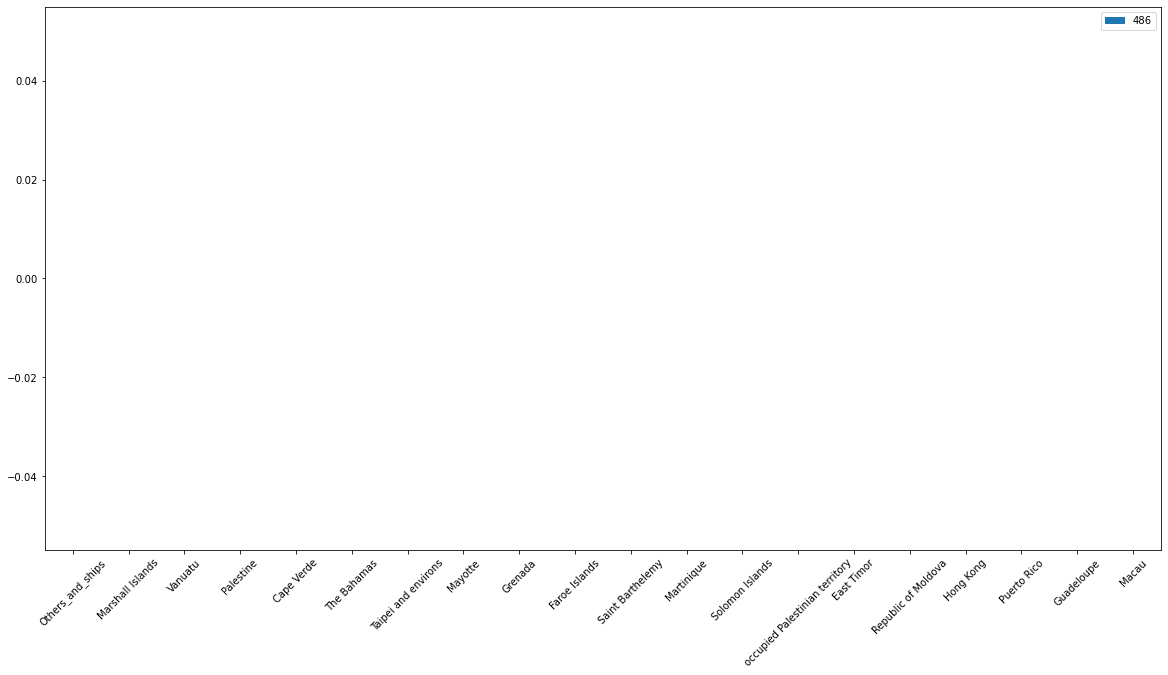

In [10]:
index = countries_remaining.tail(1)
top_remaining = countries_remaining.tail(1).transpose().sort_values(by=index.index[0], ascending=True).head(20)
top_remaining.plot(kind='bar')
plt.xticks(rotation=45)
top_remaining

,Others_and_ships,Marshall Islands,Vanuatu,Palestine,Cape Verde,The Bahamas,Taipei and environs,Mayotte,Grenada,Faroe Islands,Saint Barthelemy,Martinique,Solomon Islands,occupied Palestinian territory,East Timor,Republic of Moldova,Hong Kong,Puerto Rico,Guadeloupe,Macau
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,2.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
483,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
485,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


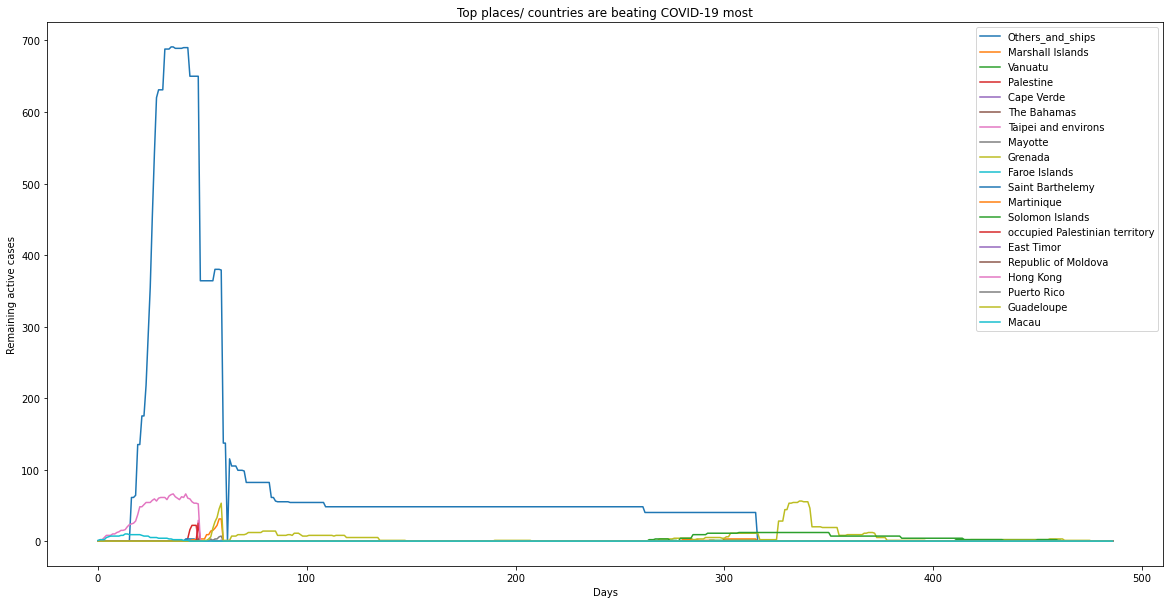

In [11]:
countries_remaining[top_remaining.index].plot()
plt.xlabel('Days')
plt.ylabel('Remaining active cases')
plt.title("Top places/ countries are beating COVID-19 most")
countries_remaining[top_remaining.index]

### Countries are beating COVID least

,486
US,32515181.0
France,5488735.0
United Kingdom,4332892.0
Spain,3406457.0
India,2805399.0
Netherlands,1605505.0
Brazil,1466788.0
Sweden,1043975.0
Belgium,1022305.0
Serbia,702907.0


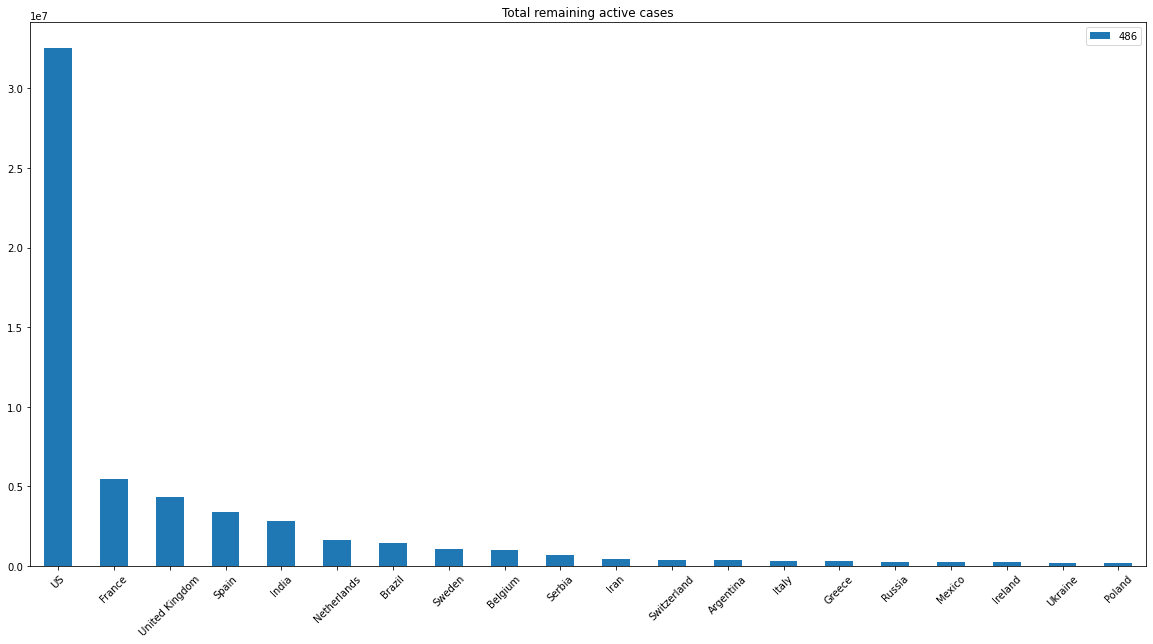

In [12]:
bottom_remaining = countries_remaining.tail(1).transpose().sort_values(by=index.index[0], ascending=False).head(20)
bottom_remaining.plot(kind='bar')
plt.title("Total remaining active cases")
plt.xticks(rotation=45)
bottom_remaining

Text(0.5, 1.0, 'Top places/ countries are beating COVID-19 least')

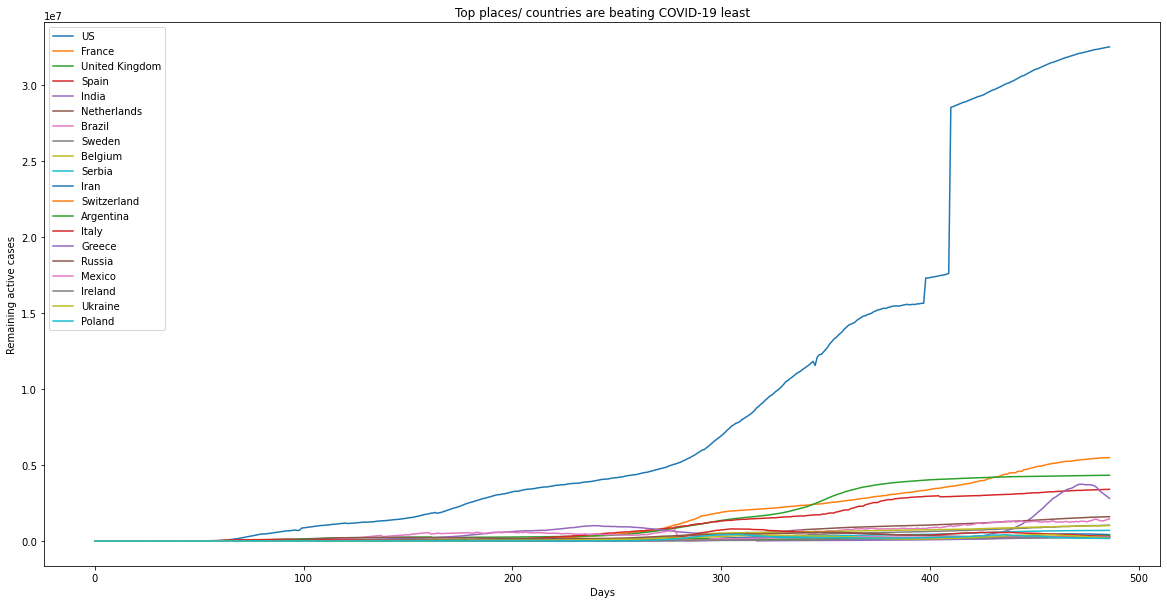

In [13]:
countries_remaining[bottom_remaining.index].plot()
plt.xlabel('Days')
plt.ylabel('Remaining active cases')
plt.title("Top places/ countries are beating COVID-19 least")

#### The current remaining days is not included with the recovered data from US. 
#### See: https://github.com/CSSEGISandData/COVID-19/issues/3464